<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Топ-10-городов" data-toc-modified-id="Топ-10-городов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Топ 10 городов</a></span></li><li><span><a href="#Зависимость-количества-полетов-от-модели-самолета" data-toc-modified-id="Зависимость-количества-полетов-от-модели-самолета-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Зависимость количества полетов от модели самолета</a></span></li><li><span><a href="#Среднее-количество-полетов-в-каждый-город" data-toc-modified-id="Среднее-количество-полетов-в-каждый-город-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Среднее количество полетов в каждый город</a></span></li><li><span><a href="#Среднее-количество-рейсов-за-год-в-городах-топ-10" data-toc-modified-id="Среднее-количество-рейсов-за-год-в-городах-топ-10-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Среднее количество рейсов за год в городах топ 10</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data1=pd.read_csv('/datasets/query_1.csv')
display(data1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
data2=pd.read_csv('/datasets/query_3.csv')
display(data2)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
def fun_date(data):
    print('**Общая информация датафрейма**')
    print(data.info())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Просмотр статистических данных**')
    print(data.describe())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод рандомных строк датафрейма**')
    print(data.sample(n=3, random_state=1))
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод первых пяти строк датафрейма**')
    print(data.head())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод количесва дубликатов датафрейма**')
    print(data.duplicated().sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод количесва пропущеных значений датафрейма**')
    print(data.isnull().sum())
    #print(msno.heatmap(data))
    print('-------------------------------------------------------------------------------------------------------------')
print(fun_date(data1))
print('*****************************************************************************************************************')
print('*****************************************************************************************************************')
print('*****************************************************************************************************************')
print(fun_date(data2))

**Общая информация датафрейма**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
-------------------------------------------------------------------------------------------------------------
**Просмотр статистических данных**
       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000
-------------------------------------------------------------------------------------------------------------
**Вывод рандомных строк датафрейма**
                 model  flights_amount
7  Sukhoi SuperJet-100            4185
2       Boeing 737-300             630
1      Airbus A321-200             960
-------------------------------------------------------------------------------------------

<div class="alert alert-info"> 
Файлы загружены и изучены. Типы данных в порядке, продолжем исследование.
</div>

In [6]:
def memory(data):
    for dtype in ['float','int','object']:
        selected_dtype = data.select_dtypes(include=[dtype])
        mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
        mean_usage_mb = mean_usage_b / 1024 ** 2
        print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))
print(memory(data2))


Average memory usage for float columns: 0.00 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.01 MB
None


In [7]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

data_float = data2.select_dtypes(include=['float'])
converted_float = data_float.apply(pd.to_numeric,downcast='float')


print(mem_usage(data_float))
print(mem_usage(converted_float))
print()

compare_floats = pd.concat([data_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

0.00 MB
0.00 MB



,before,after
float32,NaN,1.0
float64,1.0,NaN


In [8]:
data2 = data2.copy()
data2[converted_float.columns] = converted_float
print(mem_usage(data2))
print()

0.01 MB



In [9]:
data2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float32
dtypes: float32(1), object(1)
memory usage: 12.0 KB


In [10]:
data2['average_flights'] = data2['average_flights'].astype('float16')

In [11]:
data2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float16
dtypes: float16(1), object(1)
memory usage: 11.8 KB


## Топ 10 городов

In [12]:
data2_top10 = data2.sort_values(by='average_flights',ascending=False).head(10)
data2_top10 = data2_top10.reset_index()
data2_top10

,index,city,average_flights
0,43,Москва,129.750000
1,70,Санкт-Петербург,31.156250
2,54,Новосибирск,17.328125
3,33,Красноярск,11.578125
4,20,Екатеринбург,11.320312
5,67,Ростов-на-Дону,10.195312
6,63,Пермь,10.132812
7,10,Брянск,10.000000
8,74,Сочи,9.609375
9,84,Ульяновск,9.578125


<div class="alert alert-info"> 
Выведен топ 10 городов по кличеству полетов за год.
</div>

## Зависимость количества полетов от модели самолета

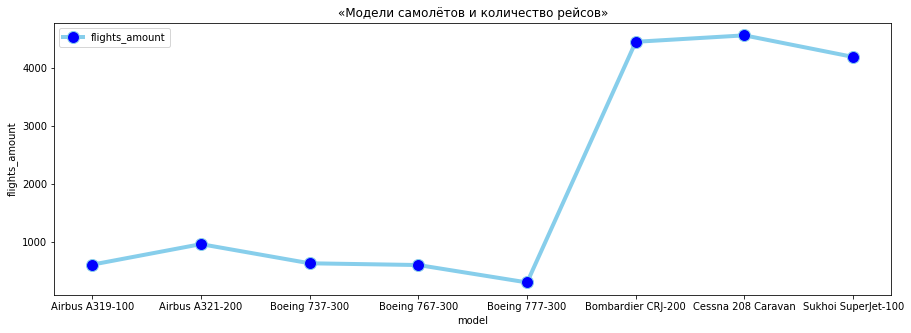

In [13]:
plt.figure(figsize=(15, 5))
plt.plot( 'model', 'flights_amount', data=data1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.xlabel('model')
plt.ylabel('flights_amount')
plt.title('«Модели самолётов и количество рейсов»')
plt.show()

<div class="alert alert-info"> 
Можно заметить, что у Airbus и Boeing заметно малое количесво полетов относительно CRJ-200, Cessna 208 и Sukhoi 100. Это странно...Тут нужно рассматривать сезонность и тренды, по скольку у Airbus и Boeing налет часов в сутки составляет около 11, а у CRJ-200, Cessna 208 и Sukhoi 100 около 4-6. Следовательно Airbus и Boeing должны были показать больший результат. Но так же можно ответить, что зимой летают именно суперджеты, тк их вместимость меньше, чем у Airbus и Boeing и авиакомпании не выгодно заполнять полупустой самолет. Вобщем это все сводится к проверки гепотизы.
</div>

## Среднее количество полетов в каждый город

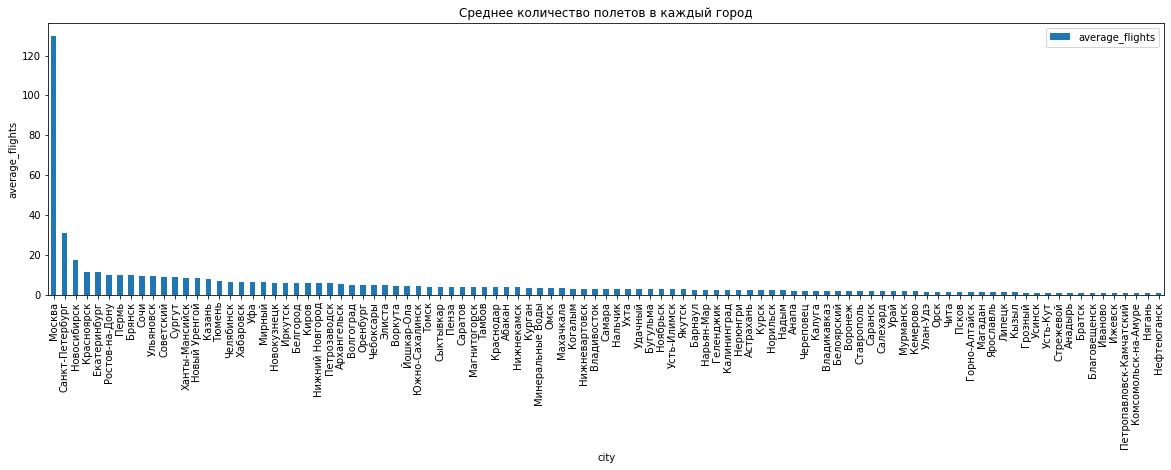

In [14]:
data2 = data2.sort_values('average_flights', ascending=False).plot.bar(x='city', y='average_flights', rot=90, figsize=(20, 5))
plt.title('Среднее количество полетов в каждый город')
plt.xlabel('city')
plt.ylabel('average_flights')
plt.show()

<div class="alert alert-info"> 
Очевидно, что в столице просходит большинсво авиарейсов, тк из дальних регионов вероятнее всего ехать поездом, исходя из ценового показателя. Но этих данных у нас нет, поэтому сделать вывод проблематично.
</div>

## Среднее количество рейсов за год в городах топ 10

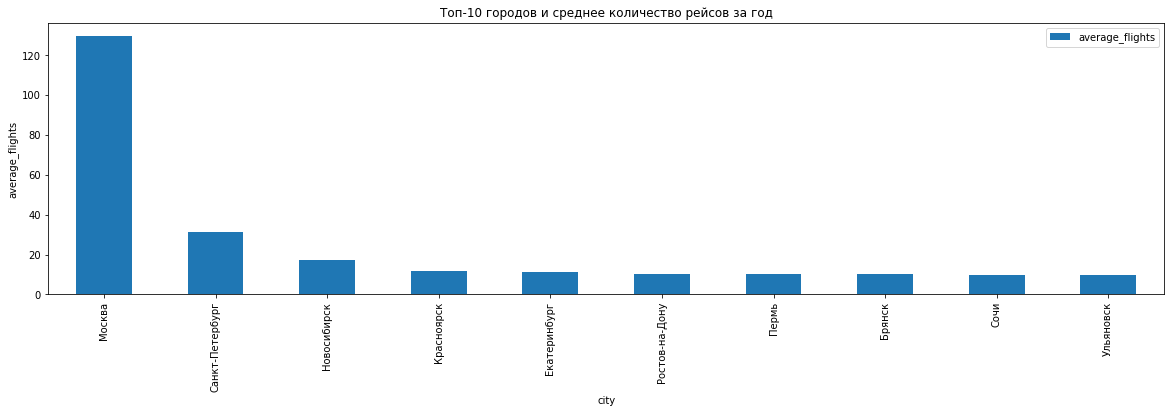

In [15]:
data2_top10.plot.bar(x='city', y='average_flights', rot=90, figsize=(20, 5))
plt.title('Топ-10 городов и среднее количество рейсов за год')
plt.xlabel('city')
plt.ylabel('average_flights')
plt.show()

<div class="alert alert-info"> 
Ну тут похожая ситуация, в основном в крпунейших городах ЦАО происходит большинсвто полетов. Почему? Потому что у города с маленьким бюджетом нет возможности организовать фестиваль.
</div>

<div class="alert alert-info"> 
Предположу, что Новосиб это крупнейшая авиаточка Сибири. Тк летают суперджеты(до 3000-4000км) - этот город возможно является точкой пересадки на другие направления.
</div>


## Общий вывод

По результатам проделанной работы можно сказать, что Москва является крупнейшим городом по пассажиро-потоку...столица как-никак. 
    
Но на самом деле все зависит от сезона прилета-отлета, потому что неьзя смело заявить, что сухой лучше боинга потому что на нем было много перевозок. Все зависит от расстояния и вместимости пассажиров. Эирбус и Боинг хороши в курортные сезоны, тк могут перевозить значительно большое количесво пассажиров и на больше расстояния, чего не скажешь про Сушку. Сушки хороши в холодное время, когда спрос на авиаперелеты не велик и пассажиропоток снижается.

Также хотелось бы отметить выделевшиеся регионы Сибири и Урала. Вероятно всего они являют пересадочными пунктами из дальних регионов страны, для дальнейшего перемещения по стране или миру.
